In [1]:
"""
"""

'\n'

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
DATE = 230630
animal = "Diego"

# DATE = 231001
# animal = "Diego"


Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onset

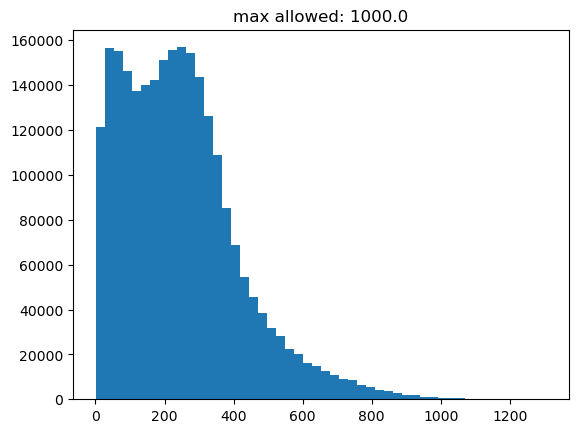

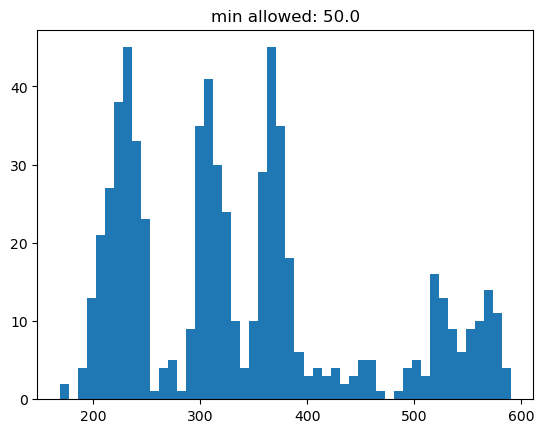

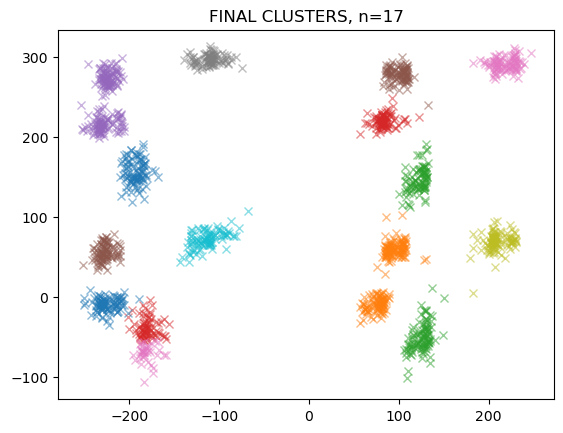

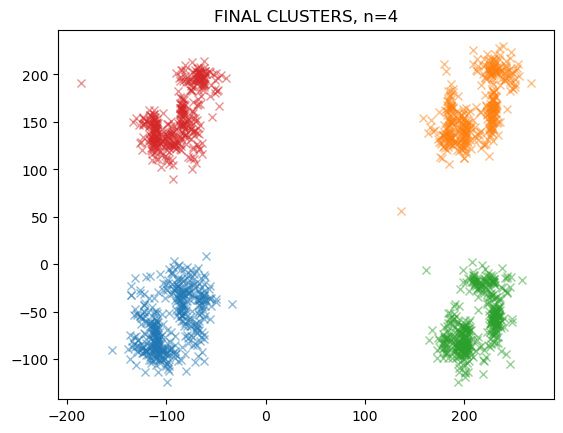

In [6]:
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="kilosort_if_exists")   
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True) 


In [ ]:
# Load a single session
sess = 1
sn_KS = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="kilosort")

# Load a single session
sess = 1
sn_TD = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="tdt")

In [ ]:
# Load a single session (WITHOUT MINIMAL LOADING)
sess = 0
sn = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=False, spikes_version="kilosort_if_exists")


TypeError: exists() missing 1 required positional argument: 'path'

### Devo - check whether fixations have been extracted fro this day

In [11]:
for sn in MS.SessionsList:
    print(sn.clusterfix_check_if_preprocessing_complete())

False


### Merging kilosort and tdt, to maximize unit yield

In [ ]:
sn = MS.SessionsList[0]
sn.DatAll[0]


In [ ]:
sn.get_trials_list()

In [ ]:
sn.datall_TDT_KS_slice_single_bysite

In [ ]:
sn._datallTDT_slice_single(2,1, 378)


In [ ]:
1

# Debugging "FULL LOADING MODE" stuff

In [ ]:
sn._MapperTrialcode2TrialToTrial

In [ ]:
sn.get_trials_list(True)

In [ ]:
sn.events_get_time_using_photodiode()

In [ ]:
sn.load_tdt_tank(include_streams=True, force_reload_from_raw=True)

In [ ]:
sn.DatTank["streams"][""]

In [ ]:
sn.DatTank["streams"]

In [ ]:
sn.events_get_time_using_photodiode_and_save()

In [ ]:
SN = sn

# save sanity checsk of pd crossings/events.
SN.eventsdataframe_sanity_check()

########## SAVE CACHED
# ALways run this since it is quick
SN._savelocalcached_extract()

# save_datslices = not checkIfDirExistsAndHasFiles(path)[1] # save if not already done.
save_datslices = not SN._savelocalcached_checksaved_datslice()
# then already extracted

SN._savelocalcached_save(save_datslices=save_datslices)

# Then delete the old data, as is redundant with the cached local
if SN._savelocalcached_check_done():
    print("DELETING, becuause they are redundant with datslices:")
    print(SN.Paths["datall_local"])
    print(SN.Paths["spikes_local"])
    os.remove(SN.Paths["datall_local"])
    os.remove(SN.Paths["spikes_local"])
else:
    assert False, "should have all been extracted in _savelocalcached_save"


# Kilosort debugging

### Compare ks to tdt 

In [ ]:
sn = MS.SessionsList[3]
savedir = "/tmp/ksgood"
sn.ks_plot_compare_tdt_to_kilosort("/tmp")

### Kilosort, get time global of start of current session, for extracting time of tdt spikes

In [ ]:
from neuralmonkey.utils.directory import rec_session_durations_extract_kilosort
out = rec_session_durations_extract_kilosort(animal, DATE)
print("-------------------------")
for k, v in out.items():
    print(k, " -- ", v)
duration_total_using_rs4_dict

sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()
# Sanity check, compare ks to tdt activity.
sn_KS.datall_TDT_KS_slice_single_bysite(1412, 0)
sn_KS.sitegetterKS_all_sites()
sn.

### Overlay spikes onto raw data

In [ ]:
sn_KS = MS.SessionsList[1]

In [ ]:
sn_KS.SPIKES_VERSION = "kilosort"
sn_KS._SPIKES_VERSION_INPUTED = "kilosort"

In [ ]:
sn_KS.sitegetterKS_all_sites()

In [ ]:
site = 1273
trial = sn_KS.get_trials_list(True)[-2]
print(sn_KS.sitegetterKS_thissite_info(site))

In [ ]:
sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()

In [ ]:

twind_plot = None
twind_plot = [0.2, 0.25]
sn_KS.plot_raw_overlay_spikes_on_raw_filtered(site, trial, twind_plot)
sn_KS.ks_plot_compare_overlaying_spikes_on_raw_filtered(site, trial)

### Plot example raster

In [ ]:
for t in trials:
    assert sn_KS.datasetbeh_trial_to_trialcode(t)==sn_TD.datasetbeh_trial_to_trialcode(t)
    assert sn_KS.datasetbeh_trial_to_datidx(t)==sn_TD.datasetbeh_trial_to_datidx(t)
    
assert np.all(sn_TD.Datasetbeh.Dat["trialcode"] == sn_KS.Datasetbeh.Dat["trialcode"])

In [ ]:
sn_KS._CachedTrialOnset == sn_TD._CachedTrialOnset


In [ ]:
sn_KS.RecPathBaseLocal

In [ ]:

sn_KS._CachedTrialOnset 

In [ ]:
site = 125
trials = sn_TD.get_trials_list(True)
sn_TD.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

In [ ]:
site = 1127

site = 7
sn_KS.sitegetterKS_thissite_info(site)

In [ ]:
trials = sn_KS.get_trials_list(True)
sn_KS.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

##### Fixation touch and done

In [ ]:
trial = 813
sn.beh_extract_touch_in_done_button(trial,  ploton=True)

In [ ]:
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=48, ploton=True)
trial = 114
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=52, ploton=True)
times, touch = sn.beh_extract_touch_in_fixation_square(trial, ploton=True)



# Debugging event extraction (e.g., photodiode)

##### Sanity checks across trialsm

In [ ]:
# Compare times of events, e..g, make sure done alway soccurs after 
for trial in sn.get_trials_list(True):
    print(trial)
    
    tmp = sn.events_get_times_as_array(trial, ["fixtch", "go", "doneb"])
    if np.isnan(tmp[2]):
        continue
    else:
#         print(tmp[2] - tmp[1])
        assert (tmp[2] - tmp[1])>0
        

In [ ]:
trial = 21
event = "fixtch"
for trial in sn.get_trials_list(True):
    a = sn.events_get_time_using_photodiode(trial, list_events=[event])
    b = sn.events_get_time_using_photodiode(trial, list_events=[event], do_reextract_even_if_saved=True)
    print(trial, a, b, a==b)
    if len(a[event])>0:
        assert np.abs(a[event][0]-b[event][0])<0.01


##### Plot pd

In [ ]:
%matplotlib inline
trial = 13
event = "go"
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, 
                                    do_reextract_even_if_saved=True)


In [ ]:
import numpy as np
np.linspace(-0.015, 0.055, 50)

In [ ]:
np.linspace(-0.045, 0.045, )

In [ ]:
np.linspace(1,10)


In [ ]:
print(10)

In [ ]:
sn.events_get_time_sorted(trial, ["fixcue", "fixtch"])[0]

In [ ]:
trial = 594
%matplotlib inline

sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, overwrite=True)

##### Problem: fixtouch even before fixation cue onset

In [ ]:
# Solution: detect cases. call the onset the same time as fixcue onset.

In [ ]:
for t in sn.get_trials_list(True):
    if sn.beh_check_touching_fixation_square_during_onset(t):
        print(t)

In [ ]:
touch.shape

#### Plot

In [ ]:
sn.extract_data_tank_epocs("camtrialoff")

In [ ]:
sn.DatTank["epocs"]

In [ ]:
# sn.DatTank["streams"]["Mic1"]
# sn.DatTank["streams"]["PhD2"]
# sn.DatTank["streams"]["Eyee"]
sn.DatTank["streams"]["PhDi"]

In [ ]:
%matplotlib inline
sites = sn.sitegetterKS_all_sites()
trial= 13
sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=False,  overlay_trial_events_notpd=True)
# sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=True,  overlay_trial_events_notpd=False)



In [ ]:
%matplotlib inline
sites = sn.sitegetterKS_all_sites()
trial= 21
sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=False,  overlay_trial_events_notpd=True)
# sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=True,  overlay_trial_events_notpd=False)



In [ ]:
trials = sn.get_trials_list(True, True)
sites = sn.sitegetter_all()
pre = -0.55
post = -0.05
sn.smoothedfr_extract_timewindow(trials, sites, "first_raise", pre, post)

sn.events_get_time_using_photodiode(269, list_events=["first_raise"], plot_beh_code_stream = True, overwrite=True)

In [ ]:
sn.plotwrapper_raster_oneetrial_multsites(269, sites[:10])

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results_time_trajectories
plot_all_results_time_trajectories()

# Get times of events on each trial

In [ ]:
SN = MS.SessionsList[0]
SN.eventsdataframe_sanity_check()

# [GOOD] Methods to preprocess data (to be clean)

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
# 0. Spike singnal to noise.

In [ ]:
# 1. Drift over time (spike waveform)

In [ ]:
sn._CachedDatSlice.keys()

In [ ]:
# 1. Drift (fr modulation)
# TODO - how to effiicently get all trials x sites data?

for site in sn.sitegetterKS_all_sites():
    print(site)
    for trial in sn.get_trials_list():
        dat = sn.datall_TDT_KS_slice_single_bysite(site, trial)


In [ ]:
# 1. Drift over time (fr)
 
site = sn.sitegetterKS_all_sites()[0]
trial = sn.get_trials_list()[0]

In [ ]:
sn.sitestats_fr_get_and_save(save=False)

In [ ]:
sn.sitestats_fr(site)

In [ ]:
dat = sn.datall_TDT_KS_slice_single_bysite(site, trial)

dat[""]

In [ ]:
# 2. Outliers trials

In [ ]:
# 3. Low FR

In [ ]:
# 4. Lack of modulation (fr)

# get spike counts within windows



# a. 

In [ ]:
# 5. Kilosort, add it any missed chans (TDT)